Analysis of Skinvision data

Install all necessary packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import StratifiedTable

Load data from csv

In [2]:
raw_data = pd.read_csv("Senior_Data_Analyst_Assessment_Dataset.csv")

In [3]:
# Preview first 10 rows
display(raw_data.head(10))

,lesion_id,image_id,dx,dx_type,age,sex,localization,clinic_id,device_version,plan_type,sv_recommendation
0,118,27419,bkl,histo,NaN,man,scalp,clinic_7,v2.1,3 months plan,low
1,118,25030,bkl,histo,80.0,male,scalp,clinic_5,dev_prototype,3 months plan,low
2,2730,26769,bkl,histo,80.0,male,scalp,clinic_7,v2.0,year plan,low
3,2730,25661,bkl,histo,NaN,male,scalp,clinic_3,dev_prototype,year plan,low
4,1466,31633,bkl,histo,75.0,male,ear,clinic_4,dev_prototype,year plan,low
5,1466,27850,bkl,histo,75.0,male,ear,clinic_7,v1.1,year plan,low
6,2761,29176,bkl,histo,60.0,Male,face,clinic_2,v2.0,3 months plan,high
7,2761,29068,bkl,histo,60.0,Male,face,clinic_2,v2.0,3 months plan,low
8,5132,25837,bkl,histo,NaN,woman,back,clinic_1,v2.0,3 months plan,low
9,5132,25209,bkl,histo,70.0,female,back,clinic_1,dev_prototype,3 months plan,low


Make a copy of the data to not change the original.

In [4]:
data = raw_data.copy()

## Data Checks

In [5]:
data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization,clinic_id,device_version,plan_type,sv_recommendation
count,10516.000000,10516.000000,10516,10516,8468.000000,9490,9994,10516,10516,10516,10516
unique,NaN,NaN,7,4,NaN,10,20,9,5,3,3
top,NaN,NaN,nv,histo,NaN,male,back,clinic_9,v1.1,single check,low
freq,NaN,NaN,7019,5651,NaN,2500,2198,2254,2137,5784,7464
mean,3776.310099,29323.512933,NaN,NaN,51.701819,NaN,NaN,NaN,NaN,NaN,NaN
std,2197.242016,2891.140536,NaN,NaN,17.036515,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,24306.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1873.750000,26822.750000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3757.500000,29320.500000,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5666.000000,31827.250000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(10516, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10516 entries, 0 to 10515
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lesion_id          10516 non-null  int64  
 1   image_id           10516 non-null  int64  
 2   dx                 10516 non-null  object 
 3   dx_type            10516 non-null  object 
 4   age                8468 non-null   float64
 5   sex                9490 non-null   object 
 6   localization       9994 non-null   object 
 7   clinic_id          10516 non-null  object 
 8   device_version     10516 non-null  object 
 9   plan_type          10516 non-null  object 
 10  sv_recommendation  10516 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 903.8+ KB


In [8]:
data.isna().sum()

lesion_id               0
image_id                0
dx                      0
dx_type                 0
age                  2048
sex                  1026
localization          522
clinic_id               0
device_version          0
plan_type               0
sv_recommendation       0
dtype: int64

In [9]:
data.nunique()

lesion_id             7470
image_id             10015
dx                       7
dx_type                  4
age                     19
sex                     10
localization            20
clinic_id                9
device_version           5
plan_type                3
sv_recommendation        3
dtype: int64

In [10]:
#clearly something weird going on with the sex column, further investigation needed
data["sex"].value_counts()

sex
male       2500
female     2120
Male        888
man         825
M           801
woman       719
F           688
Female      685
Unknown     210
unknown      54
Name: count, dtype: int64

In [11]:
# clearly some overlapping data labels can be seen
data["localization"].value_counts()

localization
back               2198
trunk              1394
upper extremity    1123
lower extremity    1025
lower_extremity    1022
face                752
abdomen             521
stomach             513
chest               412
foot                311
unknown             232
neck                166
scalp               124
hand                 91
ear                  54
genital              46
acral                 7
lower exrtemity       1
trunck                1
arcal                 1
Name: count, dtype: int64

In [12]:
data["age"].value_counts()
#156 has to be an error and 0.0 must be missing values
# for the rest, create an age gategory grouping instead

age
45.0     1121
50.0     1005
55.0      859
40.0      842
60.0      686
35.0      645
70.0      628
65.0      615
75.0      520
30.0      398
80.0      326
85.0      253
25.0      206
20.0      144
5.0        78
15.0       70
10.0       37
0.0        34
156.0       1
Name: count, dtype: int64

## Cleaning the data

before all the clean ups, group data by lesion to avoid missing data issues later

In [13]:
#add a new column for the recommendation
mapping = {
    "unassessable":0,
    "low":1,
    "high":2
}

data["sv_recommendation_numeric"]=data["sv_recommendation"].map(mapping)

In [14]:
def most_frequent(series):
    """Return the most common non-null value."""
    return series.dropna().mode().iloc[0] if not series.dropna().empty else np.nan

def first_nonnull(series):
    """Return the first non-null value."""
    return series.dropna().iloc[0] if not series.dropna().empty else np.nan

In [15]:
agg_dict = {
    "lesion_id":"max",
    "age": "max",
    "sex": most_frequent,
    "localization": most_frequent,
    "sv_recommendation": "max",
    "sv_recommendation_numeric": "max",
    "dx":most_frequent,
    "dx_type": most_frequent,
    "clinic_id": "max",
    "device_version": "max",
    "plan_type": "max",
    "image_id": "count"   # <-- adds image count
}

In [16]:
data = data.groupby("lesion_id").agg(agg_dict)
data.rename(columns={"image_id": "image_count"}, inplace=True)
#data = data.groupby("lesion_id").max().reset_index()
#this cleans all the duplicate images out of the data, but keeps each prediction
#check missing values after

In [17]:
data.isna().sum()

lesion_id                      0
age                          885
sex                          573
localization                 284
sv_recommendation              0
sv_recommendation_numeric      0
dx                             0
dx_type                        0
clinic_id                      0
device_version                 0
plan_type                      0
image_count                    0
dtype: int64

Clean and standardizw the sex column.

In [18]:
# in case there are extra spaces or symbols
data["sex"] = (
    data["sex"]
      .str.strip()
      .str.lower()
      .str.replace(r"[^a-z]", "", regex=True)  # remove non-letters
)


In [19]:
#create a mapping to clean the values for sex
mapping = {
    "male": "male",
    "m": "male",
    "man": "male",
    "Male": "male",

    "female": "female",
    "Female": "female",
    "f": "female",
    "woman": "female",

    "unknown": "unknown",
    "Unknown": "unknown",
    "other": "unknown",
}

#apply the mapping
data["sex"] = data["sex"].str.lower().map(mapping).fillna("unknown")  # fallback



In [20]:
#check the results
data["sex"].value_counts()

sex
male       3615
female     3087
unknown     768
Name: count, dtype: int64

Clean and standardize the localization column.

In [21]:
# in case there are extra symbols
data["localization_cleaned"] = (
    data["localization"]
      .str.strip()
      .str.lower()
      .str.replace(r"[^a-z]", "", regex=True)  # remove non-letters
)

In [22]:
#create a mapping to clean the values for localization
mapping_localization = {
    # --- Head & Neck ---
    "face": "head_neck",
    "scalp": "head_neck",
    "ear": "head_neck",
    "neck": "head_neck",

    # --- Upper Extremity ---
    "upperextremity": "upper_extremity",
    "hand": "upper_extremity",

    # --- Lower Extremity ---
    "lowerextremity": "lower_extremity",
    "lowerexrtemity": "lower_extremity",  # typo
    "foot": "lower_extremity",

    # --- Trunk ---
    "back": "trunk",
    "chest": "trunk",
    "abdomen": "trunk",
    "stomach": "trunk",
    "trunk": "trunk",
    "trunck": "trunk",  # typo

    # --- Genital ---
    "genital": "genital",

    # --- Acral ---
    "acral": "acral",
    "arcal": "acral",   # typo

    # --- Unknown ---
    "unknown": "unknown",
}

#apply the mapping
data["localization_clean"] = (
    data["localization_cleaned"]
        .str.strip()
        .str.lower()
        .map(mapping_localization)
        .fillna("unknown")  # fallback
)

In [23]:
#check the results
#note that we kept the original data in the column localization in case the more detailed information is still needed later
data["localization_clean"].value_counts()

localization_clean
trunk              3732
lower_extremity    1728
upper_extremity     807
head_neck           681
unknown             478
genital              41
acral                 3
Name: count, dtype: int64

Clean and standardize the age column.

In [24]:
data['age'] = data['age'].replace({156: np.nan, 0: np.nan})

In [25]:
#divide into age categories
bins = [0, 18, 35, 50, 65, 80, 200]
labels = [
    "0–17 Children",
    "18–34 Young Adults",
    "35–49 Middle-aged Adults",
    "50–64 Older Adults",
    "65–79 Seniors",
    "80+ Elderly"
]

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [26]:
# handle missing values
data['age_group'] = data['age_group'].cat.add_categories(["Missing"])
data.loc[data['age'].isna(), 'age_group'] = "Missing"

In [27]:
data['age_group'].value_counts()
#check results

age_group
35–49 Middle-aged Adults    2154
50–64 Older Adults          2074
65–79 Seniors               1297
Missing                      906
18–34 Young Adults           520
80+ Elderly                  408
0–17 Children                111
Name: count, dtype: int64

## Export data

In [28]:
#add a new column for the final recommendation
mapping = {
    0: "unassessable",
    1:"low",
    2:"high"
}

data["sv_recommendation_final"]=data["sv_recommendation_numeric"].map(mapping)

In [32]:
#add category for image data
data["image_category"] = np.where(
    data["image_count"] > 3, "4 or more",
    np.where(data["image_count"] > 1, "2-3", "1")
)

## Export the data to excel for visualization in Power BI

In [33]:
data.to_excel('data_uniquelesion.xlsx', index = False)

## Experimentation

In [36]:
# Hypothesis 1 : elderly and senior have a higher cancer rate than other groups / cancer rate grow with age
cancer_labels = ["akiec", "bcc", "mel"]

data["is_cancer"] = data["dx"].isin(cancer_labels).astype(int)

In [39]:
table = pd.crosstab(data["age_group"], data["is_cancer"])
print(table)

is_cancer                    0    1
age_group                          
0–17 Children              110    1
18–34 Young Adults         491   29
35–49 Middle-aged Adults  2031  123
50–64 Older Adults        1778  296
65–79 Seniors              872  425
80+ Elderly                206  202
Missing                    813   93


In [40]:


chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 884.6401800288075
p-value: 7.856565062889913e-188


In [42]:
model = smf.logit("is_cancer ~ C(age_group)", data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.380475
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              is_cancer   No. Observations:                 7470
Model:                          Logit   Df Residuals:                     7463
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.1229
Time:                        20:28:11   Log-Likelihood:                -2842.1
converged:                       True   LL-Null:                       -3240.5
Covariance Type:            nonrobust   LLR p-value:                7.573e-169
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.7

In [43]:
np.exp(model.params)

Intercept                                     0.009091
C(age_group)[T.18–34 Young Adults]            6.496945
C(age_group)[T.35–49 Middle-aged Adults]      6.661743
C(age_group)[T.50–64 Older Adults]           18.312711
C(age_group)[T.65–79 Seniors]                53.612385
C(age_group)[T.80+ Elderly]                 107.864078
C(age_group)[T.Missing]                      12.583026
dtype: float64

In [45]:
model2 = smf.logit("is_cancer ~ C(age_group) + C(sex) + C(localization_clean)", data=data).fit()
print(model2.summary())

         Current function value: 0.364930
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              is_cancer   No. Observations:                 7470
Model:                          Logit   Df Residuals:                     7455
Method:                           MLE   Df Model:                           14
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.1588
Time:                        20:30:01   Log-Likelihood:                -2726.0
converged:                      False   LL-Null:                       -3240.5
Covariance Type:            nonrobust   LLR p-value:                9.195e-211
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -19.9188   4291.454     -0.005      0.996

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
np.exp(model2.params)

Intercept                                   2.235596e-09
C(age_group)[T.18–34 Young Adults]          7.466641e+00
C(age_group)[T.35–49 Middle-aged Adults]    8.100473e+00
C(age_group)[T.50–64 Older Adults]          2.086700e+01
C(age_group)[T.65–79 Seniors]               5.335290e+01
C(age_group)[T.80+ Elderly]                 1.003789e+02
C(age_group)[T.Missing]                     1.472787e+01
C(sex)[T.male]                              1.148253e+00
C(sex)[T.unknown]                           7.995113e-01
C(localization_clean)[T.genital]            1.825302e-05
C(localization_clean)[T.head_neck]          9.808665e+06
C(localization_clean)[T.lower_extremity]    2.548055e+06
C(localization_clean)[T.trunk]              2.847837e+06
C(localization_clean)[T.unknown]            1.911074e+06
C(localization_clean)[T.upper_extremity]    5.744956e+06
dtype: float64

C:\Users\jonna\AppData\Local\Temp\ipykernel_14448\1285224909.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("age_group")["prob_cancer"].mean().plot(kind="bar")


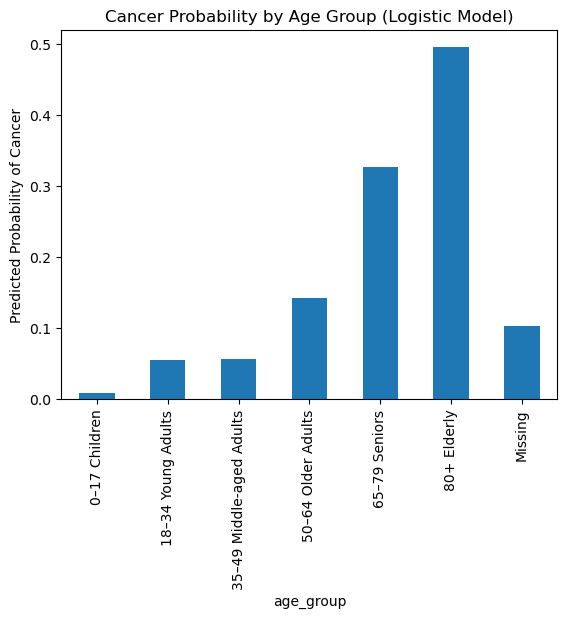

In [48]:
pred = model.predict(data)
data["prob_cancer"] = pred

data.groupby("age_group")["prob_cancer"].mean().plot(kind="bar")
plt.ylabel("Predicted Probability of Cancer")
plt.title("Cancer Probability by Age Group (Logistic Model)")
plt.show()

In [51]:
#hypothesis 2
#men more likely to have cancer in the trun, women in the extremities
#subset only cancer cases
#create a binary variable for trunk and extremities
#run logistic regression with location and sex
data_cancer = data[data["is_cancer"] == 1].copy()

In [53]:
# Define trunk vs extremities
trunk_locations = ["trunk"]
extremity_locations = ["upper_extremity", "lower_extremity"]

data_cancer["loc_trunk"] = data_cancer["localization_clean"].apply(
    lambda x: 1 if x in trunk_locations else 
              (0 if x in extremity_locations else None)
)

# Drop rows that are not trunk or extremities
data_cancer = data_cancer.dropna(subset=["loc_trunk"])

In [54]:
# use sex as predictor. Make sure sex column is categorical
data_cancer["sex"] = data_cancer["sex"].astype("category")

model = smf.logit("loc_trunk ~ C(sex)", data=data_cancer).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.674309
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              loc_trunk   No. Observations:                  853
Model:                          Logit   Df Residuals:                      850
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                 0.01875
Time:                        21:19:43   Log-Likelihood:                -575.19
converged:                       True   LL-Null:                       -586.17
Covariance Type:            nonrobust   LLR p-value:                 1.689e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2156      0.117     -1.850      0.064      -0.444       0.013
C(sex)[T

C:\Users\jonna\AppData\Local\Temp\ipykernel_14448\3316411131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cancer["sex"] = data_cancer["sex"].astype("category")


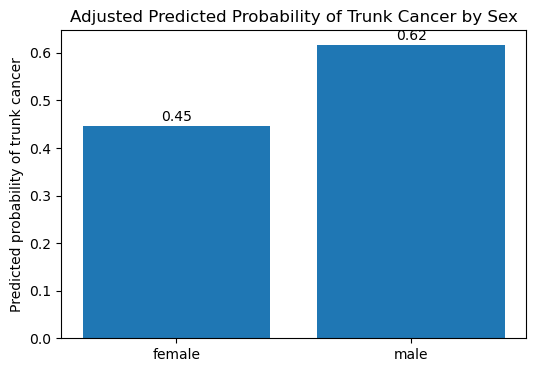

In [65]:
#age-adjusted predicted probabilities from logistic regression
# Build a prediction dataset (average male vs female)
pred_data = pd.DataFrame({
    "sex": ["female", "male"],
    "age_group": ["50–64 Older Adults", "50–64 Older Adults"],  # choose your reference
})

pred_data["pred_prob"] = model.predict(pred_data)

plt.figure(figsize=(6,4))
plt.bar(pred_data["sex"], pred_data["pred_prob"])
plt.ylabel("Predicted probability of trunk cancer")
plt.title("Adjusted Predicted Probability of Trunk Cancer by Sex")

for i, v in enumerate(pred_data["pred_prob"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")

plt.show()

KeyError: 'loc_trunk'

In [55]:

odds_ratios = np.exp(model.params)
print("\nOdds Ratios:\n", odds_ratios)


Odds Ratios:
 Intercept            0.806061
C(sex)[T.male]       1.995465
C(sex)[T.unknown]    1.717756
dtype: float64


In [56]:
#chi square test
# Filter only trunk & extremities
data_test = data_cancer[data_cancer["localization_clean"].isin(["trunk", "upper_extremity", "lower_extremity"])]

# Create extremity vs trunk column
data_test["loc_group"] = data_test["localization_clean"].apply(
    lambda x: "trunk" if x == "trunk" else "extremities"
)

# Create contingency table
table = pd.crosstab(data_test["sex"], data_test["loc_group"])
print("Contingency table:\n", table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("\nChi-square test results:")
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected counts:\n", expected)

Contingency table:
 loc_group  extremities  trunk
sex                          
female             165    133
male               189    304
unknown             26     36

Chi-square test results:
Chi2 statistic: 21.99666673731878
p-value: 1.672955957693917e-05
Degrees of freedom: 2

Expected counts:
 [[132.75498242 165.24501758]
 [219.62485346 273.37514654]
 [ 27.62016413  34.37983587]]


In [60]:
# Is the association between sex and (trunk vs extremity) cancer still significant when controlling for age group?
# Filter only trunk & extremities
data_cmh = data_cancer[data_cancer["localization_clean"].isin(
    ["trunk", "upper_extremity", "lower_extremity"]
)].copy()



In [61]:
# Create a binary location variable
data_cmh["loc_bin"] = data_cmh["localization_clean"].apply(
    lambda x: 1 if x == "trunk" else 0
)

# Keep only male/female if needed
data_cmh = data_cmh[data_cmh["sex"].isin(["male", "female"])]


In [62]:
#Build stratified 2×2 tables for each age group

tables = []

for age in data_cmh["age_group"].unique():
    subset = data_cmh[data_cmh["age_group"] == age]

    table = pd.crosstab(subset["sex"], subset["loc_bin"])

    # Ensure it is a proper 2x2 table
    if table.shape == (2, 2):
        tables.append(table.values)


In [63]:
#Run the Cochran–Mantel–Haenszel test

cmh = StratifiedTable(tables)
result = cmh.test_null_odds()

print(result)

pvalue      2.31860464272593e-07
statistic   26.747425253743415


In [68]:
# hypothesis 3
#there is no difference between men and women
#adjusted for age
model = smf.logit("is_cancer ~ C(sex) + C(age_group) + C(localization_clean)", data=data).fit()
print(model.summary())

# Odds ratios
import numpy as np
print("Odds Ratios:\n", np.exp(model.params))

         Current function value: 0.364930
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              is_cancer   No. Observations:                 7470
Model:                          Logit   Df Residuals:                     7455
Method:                           MLE   Df Model:                           14
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.1588
Time:                        22:57:29   Log-Likelihood:                -2726.0
converged:                      False   LL-Null:                       -3240.5
Covariance Type:            nonrobust   LLR p-value:                9.195e-211
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -20.0045   4477.662     -0.004      0.996

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
#age adjusted chi square
data_cmh = data[data["sex"].isin(["male", "female"])]

tables = []

for age in data_cmh["age_group"].unique():
    subset = data_cmh[data_cmh["age_group"] == age]
    table = pd.crosstab(subset["sex"], subset["is_cancer"])

    if table.shape == (2,2):
        tables.append(table.values)

cmh = StratifiedTable(tables)
print("CMH statistic:", cmh.test_null_odds().statistic)
print("p-value:", cmh.test_null_odds().pvalue)

CMH statistic: 2.6916134318293476
p-value: 0.10087762175398074


In [75]:
#hypotheses 4
#women more likely to receive recommendation unassessable
table = pd.crosstab(data["sex"], data["sv_recommendation_final"] == "unassessable")
print(table)

sv_recommendation_final  False  True 
sex                                  
female                    3010     77
male                      3556     59
unknown                    741     27


In [80]:
# Create 2x2 table: sex vs unassessable yes/no
data_ua = data[data["sex"].isin(["male", "female"])]

table = pd.crosstab(data_ua["sex"], data_ua["sv_recommendation_final"] == "unassessable")

# Convert to numpy
contingency = table.values

# Check expected counts
chi2, p, dof, expected = stats.chi2_contingency(contingency, correction=False)

if (expected < 5).any():
    # Use Fisher’s exact test
    oddsratio, p_fisher = stats.fisher_exact(contingency)
    print("Fisher’s exact test used:")
    print("Odds ratio:", oddsratio)
    print("p-value:", p_fisher)
else:
    # Use Chi-square test
    print("Chi-square test used:")
    print("Chi²:", chi2)
    print("p-value:", p)
    print("Odds ratio:", (contingency[0,1] * contingency[1,0]) / (contingency[0,0] * contingency[1,1]))

Chi-square test used:
Chi²: 6.226850871288365
p-value: 0.012582731285943696
Odds ratio: 1.5418210484824595


In [81]:
# Create binary outcome: 1 = unassessable, 0 = something else
data["is_unassessable"] = ( data["sv_recommendation_final"] == "unassessable").astype(int)

In [82]:
model = smf.logit(
    formula="is_unassessable ~ C(sex) + C(age_group) + C(localization_clean)",
    data=data
).fit()

print(model.summary())

         Current function value: 0.102976
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        is_unassessable   No. Observations:                 7470
Model:                          Logit   Df Residuals:                     7455
Method:                           MLE   Df Model:                           14
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                 0.01967
Time:                        00:21:52   Log-Likelihood:                -769.23
converged:                      False   LL-Null:                       -784.67
Covariance Type:            nonrobust   LLR p-value:                  0.005783
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -20.4006   8955.887     -0.002      0.998

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
odds_ratios = pd.DataFrame({
    "OR": np.exp(model.params),
    "Lower CI": np.exp(model.conf_int()[0]),
    "Upper CI": np.exp(model.conf_int()[1]),
    "p-value": model.pvalues
})

print(odds_ratios)

                                                    OR  Lower CI   Upper CI  \
Intercept                                 1.380812e-09  0.000000        inf   
C(sex)[T.male]                            6.664441e-01  0.470289   0.944414   
C(sex)[T.unknown]                         1.383802e+00  0.881208   2.173050   
C(age_group)[T.18–34 Young Adults]        1.387120e+00  0.168653  11.408670   
C(age_group)[T.35–49 Middle-aged Adults]  3.010693e+00  0.412806  21.957705   
C(age_group)[T.50–64 Older Adults]        2.615664e+00  0.357435  19.141101   
C(age_group)[T.65–79 Seniors]             1.801284e+00  0.238860  13.583797   
C(age_group)[T.80+ Elderly]               1.792733e+00  0.212571  15.119170   
C(age_group)[T.Missing]                   1.627680e+00  0.212031  12.495103   
C(localization_clean)[T.genital]          1.623147e+07  0.000000        inf   
C(localization_clean)[T.head_neck]        5.439081e+06  0.000000        inf   
C(localization_clean)[T.lower_extremity]  6.458707e+

C:\Users\jonna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
